In [18]:
%pylab
%matplotlib inline

params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          'text.latex.unicode' : True}
rcParams.update(params)


from fonctions_python import *
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h1><center>Points fixes et stabilité linéaire</center></h1>

<p><center>Physique non-linéaire</center></p>
<p><center>Jean-Christophe Loiseau, MdC, Arts et Métiers ParisTech</center></p>

<center><img src='Figures/classification_ordres.pdf' width=1024px /><center>

<h2><center>Systèmes du premier ordre</center></h2>

<p><center>Flows on the line</center></p>

Considérons le système dynamique suivant

$$\dot{x} = \sin(x)$$

Il existe une solution analytique à cette équation mais elle n'est absolument d'aucune aide quant à déterminer le comportement du système.

In [14]:
#--> Définition du système.
f = lambda y : sin(y) # Matlab equivalent: @(t, y) sin(y);
#--> Maillage de l'espace des phases.
x = linspace(-2*pi, 2*pi, 100)

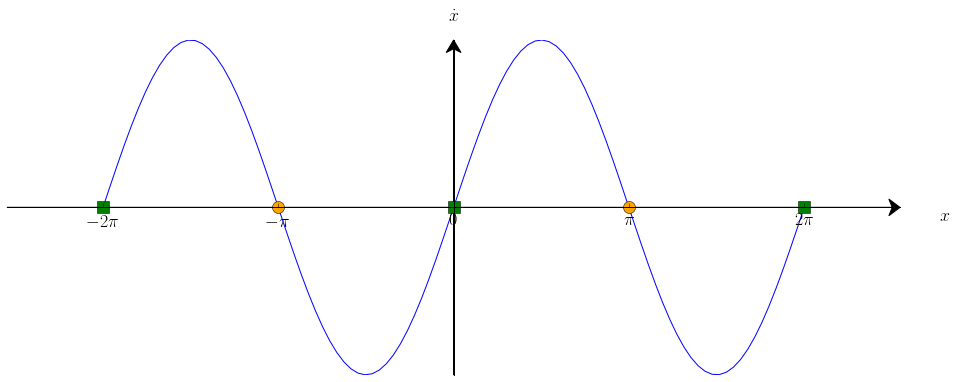

In [15]:
#--> Trace le portrait de phase du système.
phase_line_plot(x, f(x))

Bien que ce dessin ne donne que peu d'information d'un peu de vue <em>quantitatif</em>, il décrit entièrement le système d'un point de vue <em>qualitatif</em>.

Intéressons nous maintenant à deux solutions particulières

$$
\begin{aligned}
x^* = 0 \\
x^* = \pi
\end{aligned}
$$

et étudions leur stabilité.

La dynamique d'une perturbation $\eta(t) = x(t) - x^*$ est gouvernée par

$$\dot{\eta} = f(x^* + \eta)$$

En utilisant un dévelopement de Taylor, on obtient finalement

$$\dot{\eta} = f(x^*) + \eta f^{\prime}(x^*) + O(\eta^2)$$

En sachant que $f(x^*)=0$ et en supposant que $\eta$ est suffisament petit, on obtient l'équation linéarisée de la perturbation autour d'un point fixe

$$\dot{\eta} = f^{\prime}(x^*) \eta$$

Sa solution est

$$\eta(t) = e^{f^{\prime}(x^*) t} \eta_0$$

La stabilité linéaire d'un point fixe $x^*$ est donc déterminée par la valeur de $f^{\prime}(x^*)$:

- si $f^{\prime}(x^*) > 0$ alors le point fixe est linéairement instable et $\eta(t)$ croît exponentiellement,
- si $f^{\prime}(x^*) < 0$ alors le point fixe est linéairement instable et $\eta(t)$ décroît exponentiellement,
- si $f^{\prime}(x^*) = 0$, alors on ne peut rien dire.

Pour un système du premier ordre, les trajectoires ne peuvent varier que de façon monotoniques: soit elles finissent par approcher d'un point fixe, soit elles divergent vers $\pm \infty$.

</br>

<h3><center><font color="red"> Un comportement oscillant est impossible pour un système du premier ordre! </font></center></h3>

<h2><center>Systèmes du deuxième ordre</center></h2>

Un système du deuxième est un système dynamique décrit par

$$
\begin{aligned}
& \dot{x} = f(x, y) \\
& \dot{y} = g(x, y)
\end{aligned}
$$

Possédant deux degrés de liberté, ces systèmes ont une dynamique beaucoup plus riche que précédemment.

Prenons le système suivant

$$
\begin{aligned}
& \dot{x} = x - y^2 + 1.28 + 1.4 xy \\
& \dot{y} = 0.2 y - x + x^3
\end{aligned}
$$

et traçons sont portrait de phase.

In [19]:
#--> Définition du système.
f = lambda x, y: np.array([ x-y**2 + 1.28 + 1.4*x*y , 0.2*y - x + x**3])
#--> Maillage de l'espace des phases.
x = linspace(-3, 3, 100);
x, y = meshgrid(x, x);
#--> Calcul de xdot et ydot.
xdot = zeros_like(x); ydot = zeros_like(y)
xdot[:], ydot[:] = f(x[:], y[:])

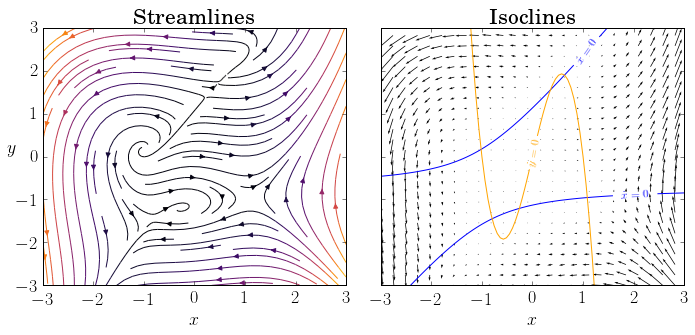

In [20]:
#--> Trace le portrait de phase.
streamlines_and_isoclines(x, y, xdot, ydot)

Malgré la complexité du système, on peut aisément déterminer sans faire de calculs (mais avec l'aide d'un peu de programmation) que:

- le système possède six points fixes repérés par l'intersection des isoclines,
- à proximité de ces différents points fixes, le système n'a pas toujours le même comportement.

Caractérisons maintenant les différents comportements possibles.

La dynamique du système au voisinage d'un point fixe ${\bf x}^*$ peut être approximée

$$\dot{\bf q} = {\bf Jq}$$

où ${\bf q}$ est une perturbation <em>inifinitésimale</em> et ${\bf J}$ est la matrice Jacobienne du système donnée par

$$
{\bf J} = \begin{bmatrix}
           \displaystyle \left. \frac{\partial f}{\partial x}\right\vert_{{\bf x}^*} & \displaystyle \left. \frac{\partial f}{\partial y}\right\vert_{{\bf x}^*} \\
           \displaystyle \left. \frac{\partial g}{\partial x}\right\vert_{{\bf x}^*} & \displaystyle \left. \frac{\partial g}{\partial y}\right\vert_{{\bf x}^*}
          \end{bmatrix}
$$

Pour un tel système linéaire, la solution ${\bf q}(t)$ peut être exprimée comme

$${\bf q}(t) = \alpha_0 \mathrm{e}^{\lambda_1 t}\hat{\bf q}_1 + \beta_0 \mathrm{e}^{\lambda_2 t} \hat{\bf q}_2$$

En injectant dans notre système dynamique linéaire, on obtient alors un problème aux valeurs propres

$${\bf JQ} = {\bf Q}{\boldsymbol \Lambda}$$

Trois cas de figures différents doivent alors être considérés

- Deux valeurs propres réelles et distinctes.
- Une paire de valeurs propres complexes conjuguées.
- Deux valeurs propres réelles et identiques.

<h3><center>Deux valeurs propres réelles et distinctes</center></h3>



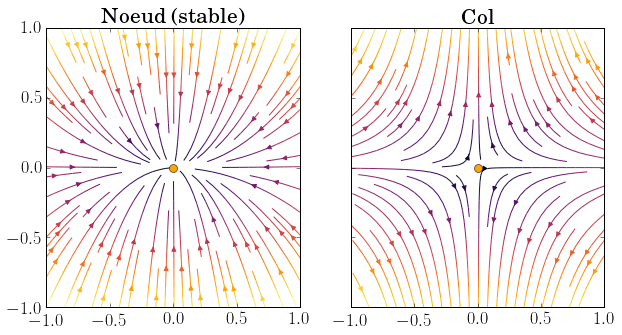

In [6]:
saddle_node()

<h3><center>Une paire de valeurs propres complexes conjuguées</center></h3>

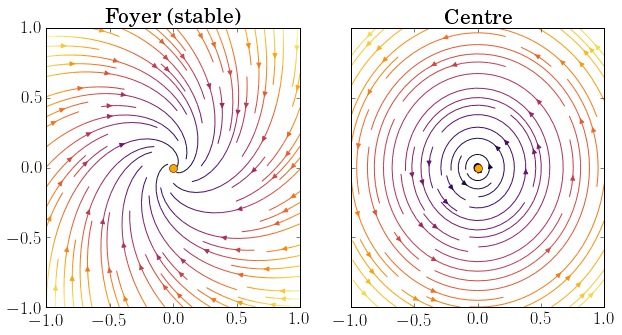

In [7]:
foyer_et_centre()

<h3><center>Deux valeurs propres réelles identiques</center></h3>

Ce cas est particulier car il y a une <em>dégénérescence</em> des valeurs propres. On peut alors montrer que l'on a

$$
\begin{aligned}
& u(t) = \mathrm{e}^{\lambda t}u_0 \\
& v(t) = \mathrm{e}^{\lambda t}(v_0 + v_1 t)
\end{aligned}
$$

où apparaît un terme dit <em>séculaire</em>. On aboutit alors à un <b>noeud impropre</b>.

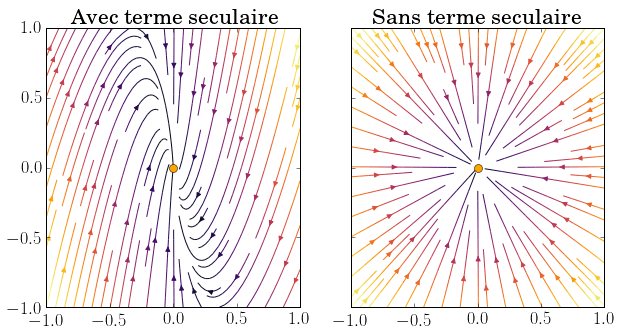

In [8]:
noeud_impropre()

<h3><center>Résumons</center></h3>

Les valeurs propres d'une matrice ${\bf J}$ de taille $2 \times 2$ sont solutions de

$$\lambda^2 - tr({\bf J}) \lambda + det({\bf J}) = 0$$

L'ensemble des différents types de points fixes vus peuvent être placés sur un diagrame $det({\bf J})$ en fonction de $tr({\bf J})$.

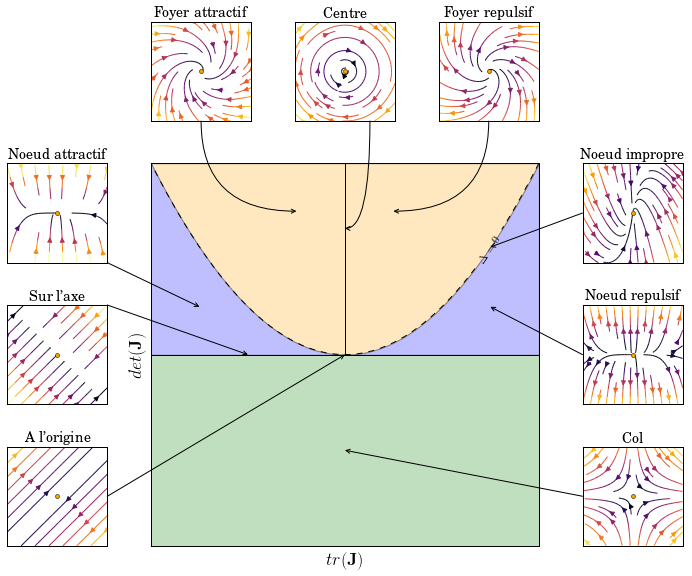

In [9]:
summary()

<center><sub>Représentation condensée des types de solutions dans le plan $tr({\bf J}) - det({\bf J})$.</sub></center>

Reprenons notre système initial et essayez de classifier ses différents points fixes visuellement.

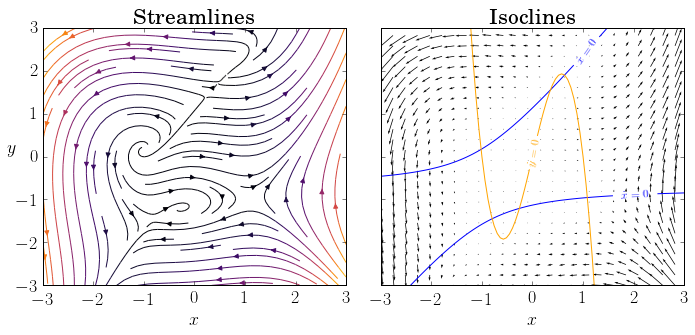

In [10]:
#--> Trace le portrait de phase.
streamlines_and_isoclines(x, y, xdot, ydot)

<h2><center>Étude de cas: Lotka-Voltera</center></h2>

<p><center>Modèle de compétition entre espèces animales</center></p>

Le modèle de Lotka-Volterra décrit simplement l'intéraction entre une population $x(t)$ de proies et de $y(t)$ prédateurs de la façon suivante

$$
\begin{align}
& \dot{x} = ax - bxy \\
& \dot{y} = -cy + dxy
\end{align}
$$

où $a$, $b$, $c$ et $d$ sont des constantes positives.

<h3><center>Étape 1: Adimensionnement</center></h3>

On peut montrer, à l'aide de changements de variables, que le système peut se mettre sous la forme équivalente suivante

$$
\begin{align}
& \dot{u} = u(1-v) \\
& \dot{v} = \alpha v (u-1)
\end{align}
$$

Le problème initial ne dépend en réalité que d'un seul paramètre, simplifiant alors considérablement notre étude.

<h3><center>Étape 2: Recherche des points fixe</center></h3>

Le système possède deux points fixes: $(u_1^* = 0, v_1^*=0)$ et $(u_2^* = 1, v_2^* = 1)$. Les matrices Jacobiennes associées sont

$$
{\bf J}_1 = \begin{bmatrix}
               1 & 0 \\
               0 & -\alpha
            \end{bmatrix} \text{ et } {\bf J}_2 = \begin{bmatrix}
                                                   0 & -1 \\
                                                   \alpha & 0
                                                  \end{bmatrix}
$$

Que peut-on dire quant à la stabilité de ces deux points fixes?

<h3><center>Étape 3: Portrait de phase</center></h3>

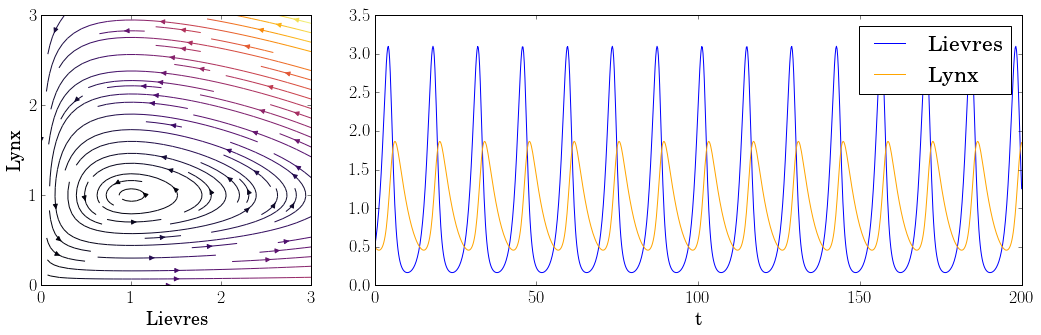

In [11]:
lotka_volterra(alpha=0.25)

Le modèle décrit qualitativement certains cas où des proies et des prédateurs sont confinés dans un même espace isolé. L'exemple le plus célèbre est celui des lynx et des lièvres dans le Nord Canadien.

<br/>

<center><img src='Figures/lotka_volterra.jpg' width='750px'/></center>

<h2><center>Cycles limites et comportement périodique</center></h2>

Considérons l'oscillateur de van der Pol

$$\ddot{x} + \mu(1-\beta x^2) \dot{x} + x = 0$$

ou encore

$$
\begin{align}
& \dot{x} = y \\
& \dot{y} = \mu(1-\beta x^2)y - x
\end{align}
$$

Le système possède un unique point fixe donné par $(x^*, y^*) = (0, 0)$. Les valeurs propres de la matrice Jacobienne associée sont

$$ \lambda = \frac{1}{2}(\mu \pm \sqrt{\mu^2-4})$$

La stabilité linéaire du point fixe est donc entièrement pilotée par la valeur de $\mu$.

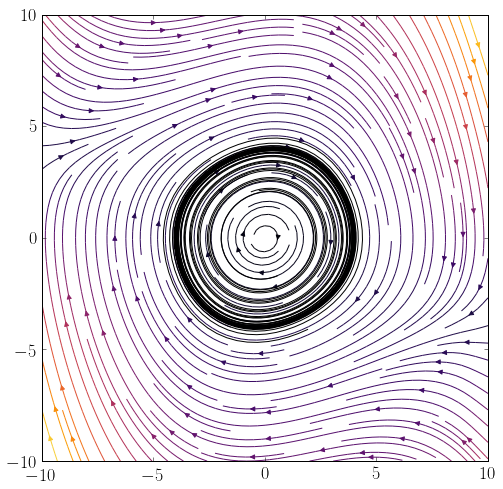

In [25]:
vanderpol(mu=.1, beta=.25)

On peut aussi démontrer par le calcul l'existence de ce cyle limite. Considérons tout d'abord le système linéarisé

$$\ddot{x} + x = 0$$

qui admet comme solution

$$x(t) = a\mathrm{e}^{it} + \bar{a}\mathrm{e}^{-it}$$

On va maintenant supposé que la solution du système non-linéaire est de la même forme mais avec $a = a(t)$ qui varie <em>lentement</em> dans le temps. En insérant dans le système non-linéaire, on trouve alors

$$
\dot{a} = \frac{\mu}{2i}\left[ 1 - \beta (a^2 \mathrm{e}^{2it} + 2 \vert a \vert^2 + \bar{a}^2\mathrm{e}^{-2it}) \right] \left( ia\mathrm{e}^{it} - i\bar{a}\mathrm{e}^{-it} \right) \mathrm{e}^{-it}
$$

L'hypothèse de la lente évolution de $a(t)$ permet d'écrire

$$\dot{a} \simeq \bar{\dot{a}}(t) = \frac{1}{T} \int_{t_0}^{t_0+T} \dot{a} \mathrm{d}t$$

On suppose donc qu'il n'y a pas de grande différence entre la valeur instantanée de $\dot{a}$ et sa valeur moyennée sur une période d'oscillation.